2.9267048253105026 -11.87450897566805


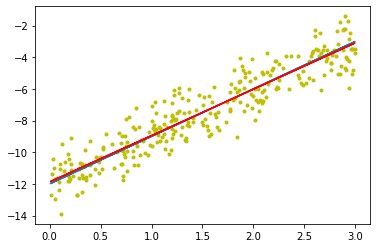

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

np.random.seed(0)

num_points = 300
a = 3
b = -12
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 3, num_points)
y = a * x + b + noise

plt.scatter(x, y, marker = '.', color = 'y')
plt.plot()
plt.plot(x, a * x + b)


id_x = np.arange(num_points)
np.random.shuffle(id_x)
train_x = id_x
x_train = x[train_x]
y_train = y[train_x]

lr = 0.01
n_epoch = 300

for epoch in range(n_epoch):
    y_test = a * x_train + b
    error = y_train - y_test
    a_gr = - 2 * (x_train * error).mean()
    b_gr = -2 * error.mean()
    
    a = a - lr * a_gr
    b = b - lr * b_gr
print(a, b)

plt.plot(x, a * x + b, color = 'r')

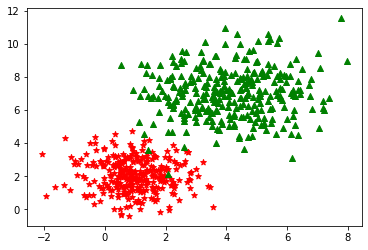

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '*', color = 'r')

mean_2 = [4, 7]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)
plt.scatter(x_2[:, 0], x_2[:, 1], marker = '^', color = 'g')

x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] * num_points)


[0.30783147 0.2271276 ] -1.0161544688527662
accuracy: 0.8766666666666667


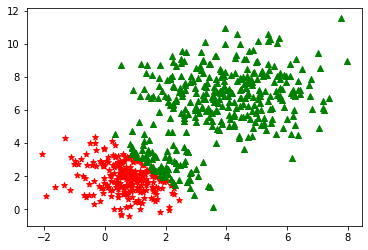

In [13]:
n_epoch = 600
y = labels


a = np.array([0, 0])
b = 0
lr = 0.01
error = np.zeros(n_epoch)
for i in range(n_epoch):
    p = 1/(1+np.exp(-(np.dot(x,a)+b)))
    a_gr = np.dot(x.T,p-y)/x.shape[0]
    b_gr = (p-y).mean()
    error[i] = -(y*np.log(p)*(1-y)*np.log(1-p)).mean()
    a = a - lr * a_gr
    b = b - lr * b_gr
print (a, b)

pred = np.zeros(x.shape[0])
p = 1/(1+np.exp(-(np.dot(x,a)+b)))
for i in range(x.shape[0]):
    if(p[i] >= 0.5):
        pred[i] = 1

print("accuracy:", 1 - abs(y-pred).mean())

plt.scatter(x[:, 0][pred==0], x[:, 1][pred==0], marker = '*', color = 'r')
plt.scatter(x[:, 0][pred==1], x[:, 1][pred==1], marker = '^', color = 'g')